In [1]:
import math
import numpy as py
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense, LSTM
import matplotlib.pyplot as pl


In [2]:
pd.set_option('display.max_columns',10)
pd.set_option('display.max_rows',10)
df=pd.read_csv('Downloads/DATA/from_org.csv')
df=df.loc[:3368,'AMP.AX':'MOC.AX']
df

,AMP.AX,ANZ.AX,ABA.AX,CBA.AX,BOQ.AX,NAB.AX,BEN.AX,WBC.AX,SUN.AX,MOC.AX
0,66.348932,73.007010,53.122866,71.967848,64.740733,73.266238,65.147966,65.427312,64.384370,18.038655
1,64.993038,72.468093,52.199503,71.210589,63.282321,72.671414,64.938998,64.965573,62.747295,18.253164
2,64.542310,72.306385,52.716700,71.056825,63.110428,72.670109,64.459478,64.319173,62.298366,18.787412
3,64.316069,72.025340,52.536598,71.265759,63.235621,72.621152,64.774625,64.479063,62.459102,17.797468
4,64.304968,71.536671,49.589137,70.959854,63.331821,72.421838,64.618360,65.173689,62.334099,17.796473
...,...,...,...,...,...,...,...,...,...,...
3263,32.156267,72.687256,37.170231,62.924170,64.481247,73.779921,69.638336,73.200078,46.435567,28.960850
3264,34.116214,73.197336,37.572115,62.525873,66.866299,74.288039,70.714567,74.049295,45.244585,29.921162
3265,34.028620,72.525208,38.343115,61.757512,64.026818,73.244201,70.845609,73.129145,43.477979,29.201132
3266,35.597246,71.960309,42.297603,62.064464,63.448985,72.442255,69.529111,72.617734,45.128635,28.875439


In [3]:
data=df['BEN.AX']
modeldata=data.values
train_len=math.ceil(len(modeldata)*0.8)
pre_train_set=modeldata.reshape(-1,1)[:train_len,:]
pre_test_set=modeldata.reshape(-1,1)[train_len-60:,:]

In [4]:
scaler=MinMaxScaler(feature_range=(0,1))
train_set=scaler.fit_transform(pre_train_set)
test_set=scaler.fit_transform(pre_test_set)

In [5]:
x_train=[]
y_train=[]

for i in range(60,train_len):
    x_train.append(train_set[i-60:i,0])
    y_train.append(train_set[i,0 ])
x_train,y_train=py.array(x_train),py.array(y_train)
#LSTM requires to have 3D input
x_train=py.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [6]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam',loss='MSE')

In [7]:
model.fit(x_train,y_train, batch_size=20, epochs=10)

Epoch 1/10
128/128 [==============================] - 26s 82ms/step - loss: 0.0168
Epoch 2/10
128/128 [==============================] - 11s 86ms/step - loss: 0.0025
Epoch 3/10
128/128 [==============================] - 11s 84ms/step - loss: 0.0025
Epoch 4/10
128/128 [==============================] - 11s 87ms/step - loss: 0.0021
Epoch 5/10
128/128 [==============================] - 11s 86ms/step - loss: 0.0017
Epoch 6/10
128/128 [==============================] - 11s 85ms/step - loss: 0.0015
Epoch 7/10
128/128 [==============================] - 13s 98ms/step - loss: 0.0015
Epoch 8/10
128/128 [==============================] - 12s 95ms/step - loss: 0.0015
Epoch 9/10
128/128 [==============================] - 12s 90ms/step - loss: 0.0012
Epoch 10/10
128/128 [==============================] - 12s 90ms/step - loss: 0.0018


In [8]:
x_test=[]
y_test=modeldata.reshape(-1,1)[train_len:,:]
for i in range(60, len(test_set)):
    x_test.append(test_set[i-60:i,0])
x_test=py.array(x_test)
x_test=py.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

In [9]:
#RMSE
rmse=py.sqrt(py.mean(((predictions- y_test)**2)))
rmse

1.8313956645748672

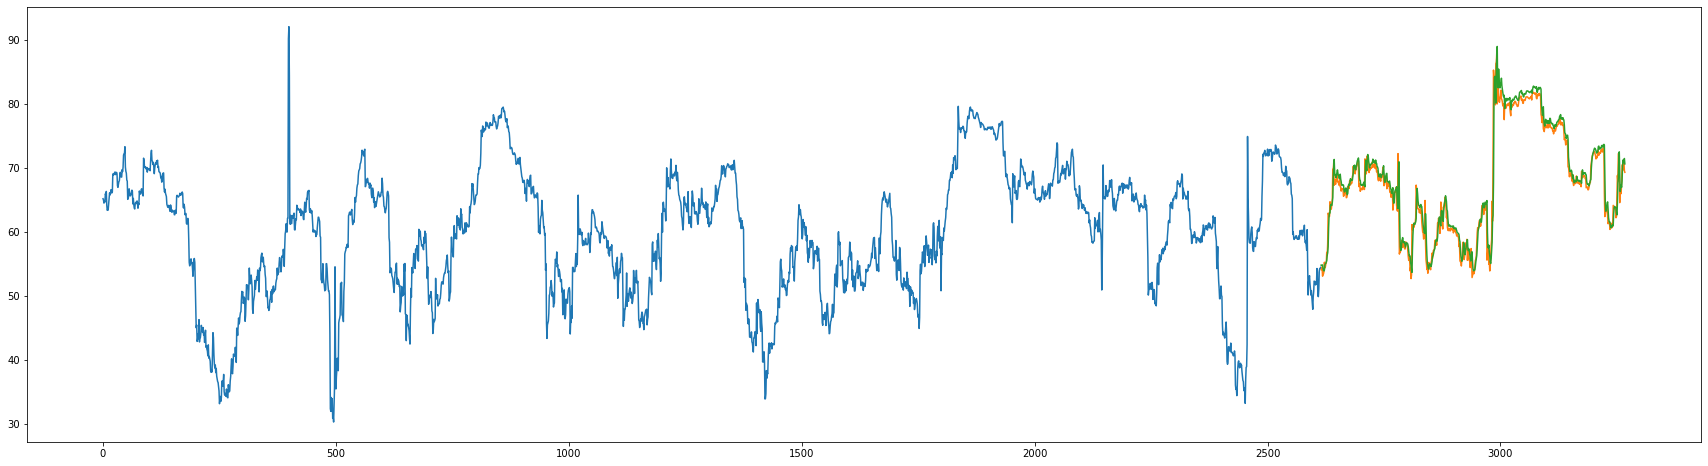

In [55]:
train=pd.DataFrame(data[:train_len])
valid=pd.DataFrame(data[train_len:])
#valid=valid.reset_index()
#train=train.reset_index()
valid['Prediction']=predictions
pl.figure(figsize=(30,8))
pl.plot(train['BEN.AX'])
pl.plot(valid['BEN.AX'])
pl.plot(valid['Prediction'])

In [11]:
import statsmodels.api as sm
from itertools import product
import itertools as it
from scipy import stats
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings("ignore")
    

In [12]:
p=d=q=range(0,4)
pdq=list(it.product(p,d,q))

for param in pdq:
    try:
        model_arima=ARIMA(pre_train_set,order=param)
        model_fit=model_arima.fit()
        print(param,model_fit.aic)
    except:
        continue

(0, 0, 0) 19391.222299876736
(0, 0, 1) 16475.33662107373
(0, 0, 2) 14490.152692704198
(0, 0, 3) 13461.587177863896
(0, 1, 0) 10630.380584346869
(0, 1, 1) 10630.279800287739
(0, 1, 2) 10617.907158611753
(0, 1, 3) 10590.517453115164
(0, 2, 0) 12506.237883218653
(0, 2, 1) 10637.185109460472
(0, 2, 2) 10637.151089376985
(0, 2, 3) 10624.973599214763
(1, 0, 0) 10616.046265224766
(1, 0, 1) 10617.116160322965
(1, 0, 2) 10608.373583972176
(1, 0, 3) 10584.670905295701
(1, 1, 0) 10630.577704211137
(1, 1, 1) 10609.906530949997
(1, 1, 2) 10603.66187126212
(1, 1, 3) 10590.600852175294
(1, 2, 0) 11824.26010487953
(2, 0, 0) 10617.233628981676
(2, 0, 1) 10604.024176423129
(2, 0, 2) 10597.945957837863
(2, 0, 3) 10583.937689977629
(2, 1, 0) 10620.435442526583
(2, 1, 1) 10602.322754379868
(2, 1, 2) 10601.564626210333
(2, 1, 3) 10591.604333484762
(2, 2, 0) 11575.212528152972
(3, 0, 0) 10609.749478471904
(3, 0, 1) 10596.535851132081
(3, 0, 2) 10594.971056710923
(3, 0, 3) 10585.480946264914
(3, 1, 0) 10592.2

In [60]:
model=ARIMA(pre_train_set,order=(20,2,1))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D2.y   No. Observations:                 2613
Model:                ARIMA(20, 2, 1)   Log Likelihood               -5284.187
Method:                       css-mle   S.D. of innovations              1.825
Date:                Tue, 18 May 2021   AIC                          10614.373
Time:                        11:58:45   BIC                          10749.343
Sample:                             2   HQIC                         10663.264
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.448e-07   4.26e-05      0.010      0.992    -8.3e-05    8.39e-05
ar.L1.D2.y     -0.0369      0.020     -1.885      0.059      -0.075       0.001
ar.L2.D2.y     -0.0732      0.020     -3.746      0.000      -0.112      -0.035
ar.L3.D2.y     -0.1103      0.020     -5.625      0.000      -0.149      -0.072
ar.L4.D2.y      0.0078      0.020      0.395      0.693      -0.031       0.046
ar.L5.D2.y     -0.0411      0.020     -2.087      0.037      -0.080      -0.002
ar.L6.D2.y     -0.0022      0.020     -0.110      0.912      -0.041       0.036
ar.L7.D2.y   5.552e-05      0.020      0.003      0.998      -0.039       0.039
ar.L8.D2.y      0.0061      0.020      0.311      0.756      -0.033       0.045
ar.L9.D2.y      0.0097      0.020      0.491      0.623      -0.029       0.048
ar.L10.D2.y    -0.0254      0.020     -1.286      0.199      -0.064       0.013
ar.L11.D2.y     0.0070      0.020      0.355      0.723      -0.032       0.046
ar.L12.D2.y     0.0285      0.020      1.443      0.149      -0.010       0.067
ar.L13.D2.y    -0.0004      0.020     -0.021      0.983      -0.039       0.038
ar.L14.D2.y     0.0213      0.020      1.081      0.280      -0.017       0.060
ar.L15.D2.y    -0.0099      0.020     -0.504      0.614      -0.049       0.029
ar.L16.D2.y     0.0261      0.020      1.322      0.186      -0.013       0.065
ar.L17.D2.y    -0.0056      0.020     -0.285      0.776      -0.044       0.033
ar.L18.D2.y     0.0184      0.020      0.937      0.349      -0.020       0.057
ar.L19.D2.y     0.0363      0.020      1.855      0.064      -0.002       0.075
ar.L20.D2.y     0.0279      0.020      1.429      0.153      -0.010       0.066
ma.L1.D2.y     -0.9999      0.001   -999.375      0.000      -1.002      -0.998
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.1407           -0.0000j            1.1407           -0.0000
AR.2             1.0827           -0.4013j            1.1547           -0.0565
AR.3             1.0827           +0.4013j            1.1547            0.0565
AR.4             0.9103           -0.7143j            1.1571           -0.1059
AR.5             0.9103           +0.7143j            1.1571            0.1059
AR.6             0.6330           -0.9504j            1.1420           -0.1565
AR.7             0.6330           +0.9504j            1.1420            0.1565
AR.8             0.3135           -1.1353j            1.1778           -0.2071
AR.9             0.3135           +1.1353j            1.1778            0.2071
AR.10           -0.0421           -1.1552j            1.1559           -0.2558
AR.11           -0.0421           +1.1552j            1.1559            0.2558
AR.12           -0.4439           -1.1150j            1.

In [61]:
start=train_len
end=df.shape[0]-1
pred=model.predict(start=start,end=end,typ="levels")
#realpred=scaler.inverse_transform(pred.reshape(1,-1))
valid1=pd.DataFrame(data[train_len:])
valid1['Prediction']=pred
valid1


,BEN.AX,Prediction
2615,54.054706,54.254595
2616,54.124441,54.055697
2617,54.473977,54.060978
2618,53.036685,54.378487
2619,53.270699,54.424240
...,...,...
3263,69.638336,52.444396
3264,70.714567,52.441150
3265,70.845609,52.437904
3266,69.529111,52.434659


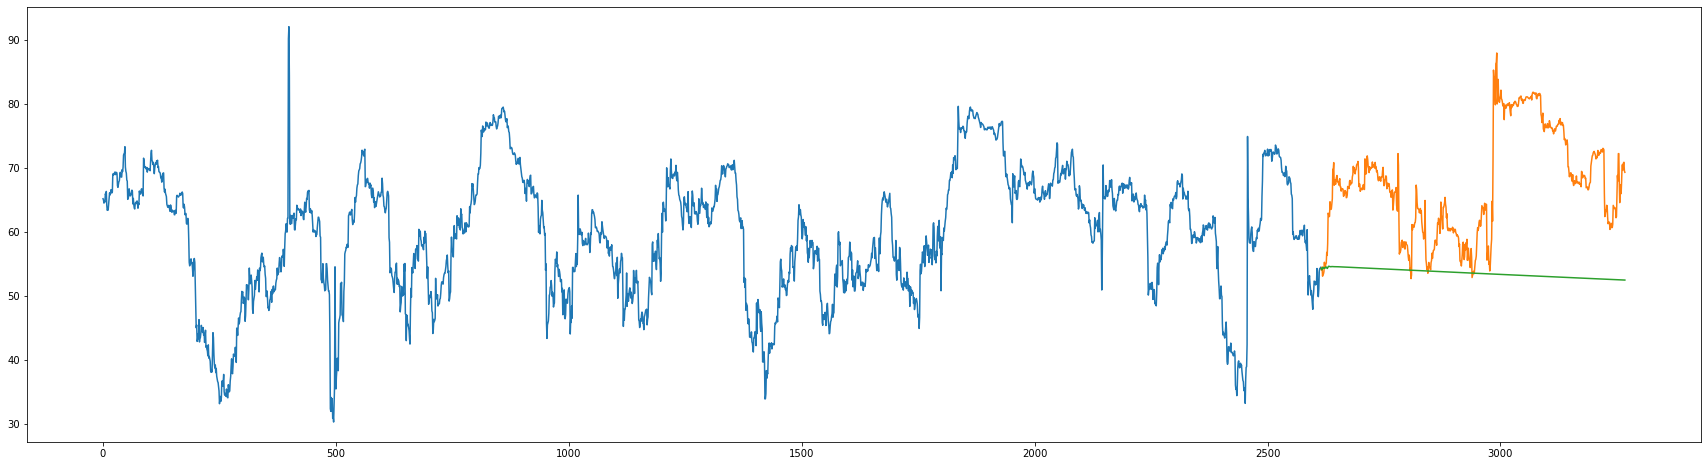

In [62]:
pl.figure(figsize=(30,8))
pl.plot(train['BEN.AX'])
pl.plot(valid1['BEN.AX'])
pl.plot(valid1['Prediction'])

In [63]:
rmse=py.sqrt(py.mean((pred- py.array(valid1['BEN.AX']))**2))
rmse

16.426988918317665

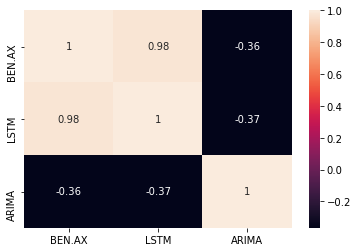

In [64]:
from xgboost import XGBRegressor 
import seaborn as sns
correl=pd.DataFrame(data=valid)
correl['ARIMA']=valid1['Prediction']
correl.columns=['BEN.AX','LSTM','ARIMA']
correl.corr()
sns.heatmap(correl.corr(), annot= True)
pl.show()
corr=py.array(correl)

In [65]:
scaler1=MinMaxScaler(feature_range=(0,1))
lstm=scaler1.fit_transform(corr[:,1].reshape(-1,1))
arim=scaler1.fit_transform(corr[:,2].reshape(-1,1))
amp=scaler1.fit_transform(corr[:,0].reshape(-1,1))
stack_predict=py.hstack([lstm,arim])

In [66]:
params_xgd = {
    'max_depth': 12,
    'objective': 'reg:logistic',
    'learning_rate': 0.05,
    'n_estimators': 10000
    }
train_Y =amp
clf = XGBRegressor(**params_xgd)
clf.fit(stack_predict,train_Y, eval_set=[(stack_predict,train_Y)], 
        eval_metric='rmse', early_stopping_rounds=20, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=12,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10000, n_jobs=8, num_parallel_tree=1,
             objective='reg:logistic', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [67]:
stacked = clf.predict(stack_predict)
stack=scaler.inverse_transform(stacked.reshape(-1,1))
valid2=pd.DataFrame(data[train_len:])
valid2['Prediction']=stack
valid2

,BEN.AX,Prediction
2615,54.054706,49.639103
2616,54.124441,49.475643
2617,54.473977,49.672020
2618,53.036685,48.882233
2619,53.270699,48.882915
...,...,...
3263,69.638336,67.337303
3264,70.714567,68.316139
3265,70.845609,68.358727
3266,69.529111,66.998489


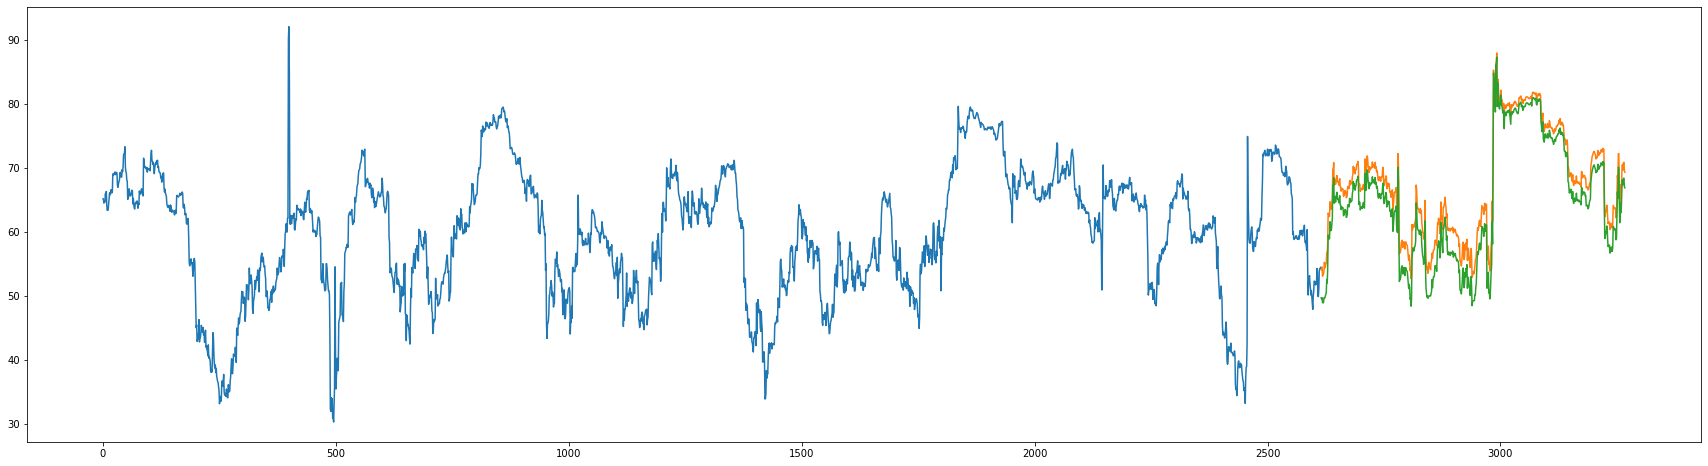

In [68]:
pl.figure(figsize=(30,8))
pl.plot(train['BEN.AX'])
pl.plot(valid2['BEN.AX'])
pl.plot(valid2['Prediction'])

In [69]:
rmse=py.sqrt(py.mean((stack- py.array(valid1['BEN.AX']))**2))
rmse

12.777149307862508

valid['Stacked']=valid2['Prediction']
valid.to_csv('BEN.AX-Pred.csv')

AMP.AX
ANZ.AX
ABA.AX
CBA.AX
BOQ.AX
NAB.AX
BEN.AX
WBC.AX
SUN.AX
MOC.AX
